In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *
import matplotlib.pyplot as plt

# Part 1

Complete the exercises found [here](https://github.com/AllenDowney/ModSimPy/blob/master/notebooks/chap08.ipynb).

### Functions from the previous chapter

In [2]:
def plot_results(census, un, timeseries, title):
    """Plot the estimates and the model.
    
    census: TimeSeries of population estimates
    un: TimeSeries of population estimates
    timeseries: TimeSeries of simulation results
    title: string
    """
    plot(census, ':', label='US Census')
    plot(un, '--', label='UN DESA')
    plot(timeseries, color='gray', label='model')
    
    decorate(xlabel='Year', 
             ylabel='World population (billion)',
             title=title)

In [3]:
def run_simulation(system, update_func):
    """Simulate the system using any update function.
    
    system: System object
    update_func: function that computes the population next year
    
    returns: TimeSeries
    """
    results = TimeSeries()
    results[system.t_0] = system.p_0
    
    for t in linrange(system.t_0, system.t_end):
        results[t+1] = update_func(results[t], t, system)
        
    return results

### Reading the data

In [4]:
def read_table2(filename = 'data/World_population_estimates.html'):
    tables = pd.read_html(filename, header=0, index_col=0, decimal='M')
    table2 = tables[2]
    table2.columns = ['census', 'prb', 'un', 'maddison', 
                  'hyde', 'tanton', 'biraben', 'mj', 
                  'thomlinson', 'durand', 'clark']
    return table2

In [5]:
#table2 = read_table2()
#table2.to_csv('data/World_population_estimates2.csv')

In [6]:
table2 = pd.read_csv('data/World_population_estimates2.csv')
table2.index = table2.Year
table2.head()

,Year,census,prb,un,maddison,hyde,tanton,biraben,mj,thomlinson,durand,clark
Year,,,,,,,,,,,,
1950,1950,2557628654,2.516000e+09,2.525149e+09,2.544000e+09,2.527960e+09,2.400000e+09,2.527000e+09,2.500000e+09,2.400000e+09,NaN,2.486000e+09
1951,1951,2594939877,NaN,2.572851e+09,2.571663e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1952,1952,2636772306,NaN,2.619292e+09,2.617949e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1953,1953,2682053389,NaN,2.665865e+09,2.665959e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1954,1954,2730228104,NaN,2.713172e+09,2.716927e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN


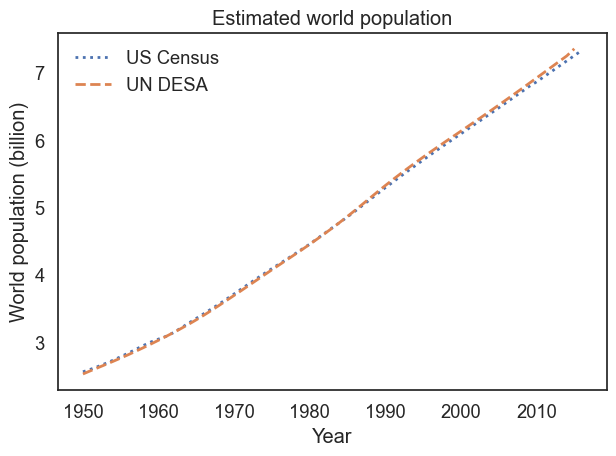

In [7]:
un = table2.un / 1e9
census = table2.census / 1e9
plot(census, ':', label='US Census')
plot(un, '--', label='UN DESA')
    
decorate(xlabel='Year', 
             ylabel='World population (billion)',
             title='Estimated world population')

### Running the quadratic model

Here's the update function for the quadratic growth model with parameters `alpha` and `beta`.

In [8]:
def update_func_quad(pop, t, system):
    """Update population based on a quadratic model.
    
    pop: current population in billions
    t: what year it is
    system: system object with model parameters
    """
    net_growth = system.alpha * pop + system.beta * pop**2
    return pop + net_growth

Extract the starting time and population.

In [9]:
t_0 = get_first_label(census)
t_end = get_last_label(census)
p_0 = get_first_value(census)

2.557628654

Initialize the system object.

In [10]:
system = System(t_0=t_0, 
                t_end=t_end,
                p_0=p_0,
                alpha=0.025,
                beta=-0.0018)

,values
t_0,1950.000000
t_end,2016.000000
p_0,2.557629
alpha,0.025000
beta,-0.001800


Run the model and plot results.

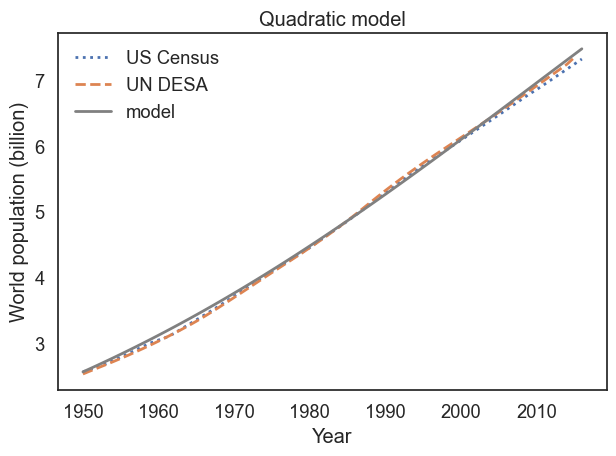

In [11]:
results = run_simulation(system, update_func_quad)
plot_results(census, un, results, 'Quadratic model')

### Generating projections

To generate projections, all we have to do is change `t_end`

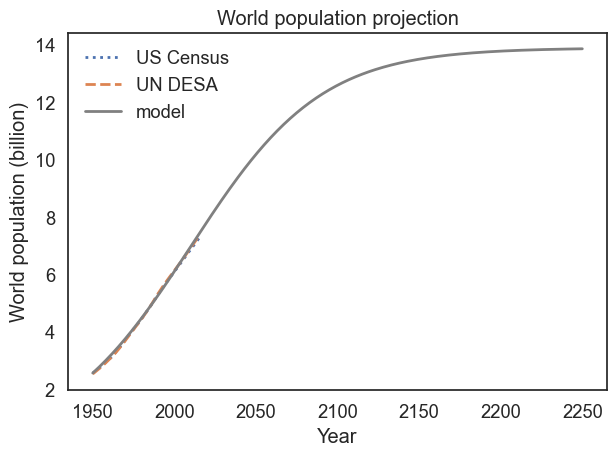

In [12]:
system.t_end = 2250
results = run_simulation(system, update_func_quad)
plot_results(census, un, results, 'World population projection')
#savefig('figs/chap08-fig01.pdf')

The population in the model converges on the equilibrium population, `-alpha/beta`

In [13]:
results[system.t_end]

13.856665141368708

In [14]:
-system.alpha / system.beta

13.88888888888889

**Exercise:**  What happens if we start with an initial population above the carrying capacity, like 20 billion?  Run the model with initial populations between 1 and 20 billion, and plot the results on the same axes.

In [15]:
initial_ps = np.arange(1, 21, 4)
results_arr = []

for p in initial_ps:
    system.p_0 = p 
    results_arr.append(run_simulation(system, update_func_quad))

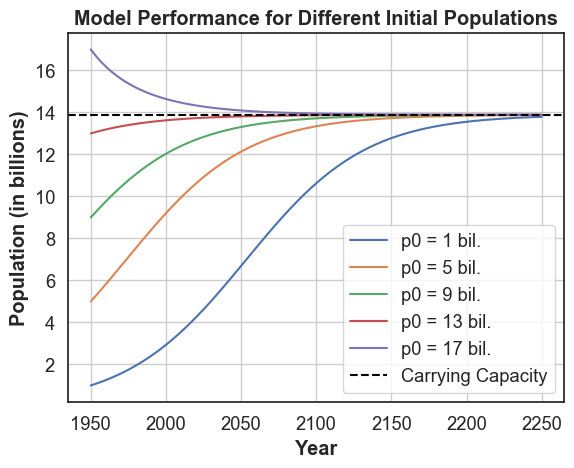

In [16]:
i = 0
for result in results_arr:
    plt.plot(result.index, result.values, label = 'p0 = %d bil.' % initial_ps[i])
    i += 1
    
plt.axhline(-system.alpha / system.beta, label='Carrying Capacity', color='black', ls='--')
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Population (in billions)', fontweight='bold')
plt.title('Model Performance for Different Initial Populations', fontweight='bold')
plt.legend()
plt.grid()
plt.show()

Once the inital population becomes too high (greater than the carrying capacity of 13.8 billion), we reach a point in which our model predicts population decrease instead of growth. 

### Comparing projections

We can compare the projection from our model with projections produced by people who know what they are doing.

In [17]:
def read_table3(filename = 'data/World_population_estimates.html'):
    tables = pd.read_html(filename, header=0, index_col=0, decimal='M')
    table3 = tables[3]
    table3.columns = ['census', 'prb', 'un']
    return table3

In [18]:
#table3 = read_table3()
#table3.to_csv('data/World_population_estimates3.csv')

In [19]:
table3 = pd.read_csv('data/World_population_estimates3.csv')
table3.index = table3.Year
table3.head()

,Year,census,prb,un
Year,,,,
2016,2016,7.334772e+09,NaN,7.432663e+09
2017,2017,7.412779e+09,NaN,NaN
2018,2018,7.490428e+09,NaN,NaN
2019,2019,7.567403e+09,NaN,NaN
2020,2020,7.643402e+09,NaN,7.758157e+09


`NaN` is a special value that represents missing data, in this case because some agencies did not publish projections for some years.

This function plots projections from the UN DESA and U.S. Census.  It uses `dropna` to remove the `NaN` values from each series before plotting it.

In [20]:
def plot_projections(table):
    """Plot world population projections.
    
    table: DataFrame with columns 'un' and 'census'
    """
    census_proj = table.census / 1e9
    un_proj = table.un / 1e9
    
    plot(census_proj.dropna(), ':', color='C0', label='US Census')
    plot(un_proj.dropna(), '--', color='C1', label='UN DESA')

Run the model until 2100, which is as far as the other projections go.

In [21]:
system = System(t_0=t_0, 
                t_end=2100,
                p_0=p_0,
                alpha=0.025,
                beta=-0.0018)

,values
t_0,1950.000000
t_end,2100.000000
p_0,2.557629
alpha,0.025000
beta,-0.001800


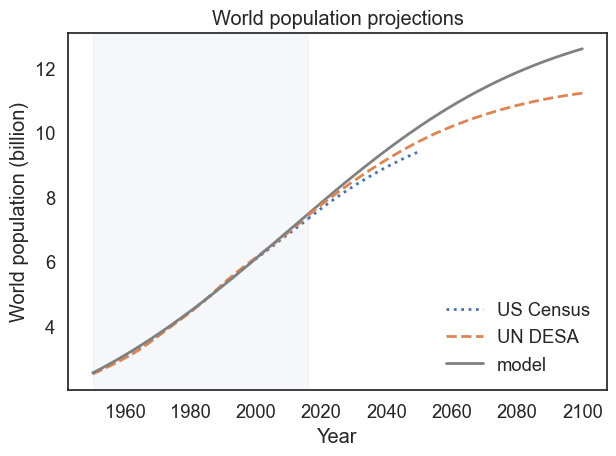

In [22]:
results = run_simulation(system, update_func_quad)

plt.axvspan(1950, 2016, color='C0', alpha=0.05)
plot_results(census, un, results, 'World population projections')
plot_projections(table3)
#savefig('figs/chap08-fig02.pdf')

People who know what they are doing expect the growth rate to decline more sharply than our model projects.

## Exercises

**Exercise:** The net growth rate of world population has been declining for several decades.  That observation suggests one more way to generate projections, by extrapolating observed changes in growth rate.

The `modsim` library provides a function, `compute_rel_diff`, that computes relative differences of the elements in a sequence.

Here's how we can use it to compute the relative differences in the `census` and `un` estimates:

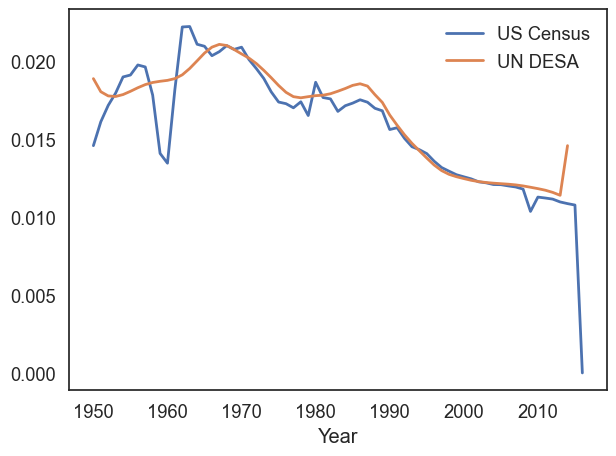

In [23]:
alpha_census = compute_rel_diff(census)
plot(alpha_census, label='US Census')

alpha_un = compute_rel_diff(un)
plot(alpha_un, label='UN DESA')

decorate(xlabel='Year', label='Net growth rate')

Other than a bump around 1990, net growth rate has been declining roughly linearly since 1965.  As an exercise, you can use this data to make a projection of world population until 2100.

1. Define a function, `alpha_func`, that takes `t` as a parameter and returns an estimate of the net growth rate at time `t`, based on a linear function `alpha = intercept + slope * t`.  Choose values of `slope` and `intercept` to fit the observed net growth rates since 1965.

2. Call your function with a range of `ts` from 1960 to 2020 and plot the results.

3. Create a `System` object that includes `alpha_func` as a system variable.

4. Define an update function that uses `alpha_func` to compute the net growth rate at the given time `t`.

5. Test your update function with `t_0 = 1960` and `p_0 = census[t_0]`.

6. Run a simulation from 1960 to 2100 with your update function, and plot the results.

7. Compare your projections with those from the US Census and UN.

In [24]:
# get linear model parameters to fit the growth rate.

from scipy.optimize import curve_fit

def lin_func(x, m, b):
    return m * x + b

fit_data = alpha_un[(alpha_un.index >= 1965) & (alpha_un.index <= 2010)]
popt, pcov = curve_fit(lin_func, fit_data.index - fit_data.index[0], fit_data.values)
popt

array([-0.00023043,  0.02147114])

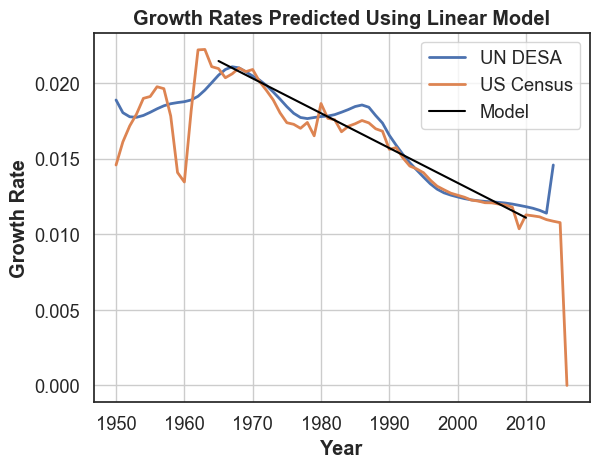

In [25]:
# plot results of linear model against actual growth rates.

def alpha_func(t):
    return popt[0] * t + popt[1]

growth_rates = [alpha_func(year) for year in fit_data.index - fit_data.index[0]]

plot(alpha_un, label='UN DESA')
plot(alpha_census, label='US Census')
plt.plot(fit_data.index, growth_rates, label='Model', color='black')
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Growth Rate', fontweight='bold')
plt.title('Growth Rates Predicted Using Linear Model', fontweight='bold')
plt.legend()
plt.grid()
plt.show()

In [26]:
# define a new system using our alpha function.

t_0 = 1960
t_end = 2100
p_0 = census[t_0]

system = System(t_0=t_0, 
                t_end=2100,
                p_0=p_0,
                alpha_func=alpha_func)

,values
t_0,1960
t_end,2100
p_0,3.043002
alpha_func,<function alpha_func at 0x7facf7c9f1f0>


In [27]:
# run simulaiton using new alpha function.

def update_pop(p, t, system):
    return p * (1 + system.alpha_func(t))

def run_simulation(system):
    """Simulate the system using any update function.
    
    system: System object
    update_func: function that computes the population next year
    
    returns: TimeSeries
    """
    results = TimeSeries()
    results[system.t_0] = system.p_0
    
    for t in linrange(system.t_0, system.t_end):
        results[t+1] = update_pop(results[t], t-system.t_0, system)
        
    return results

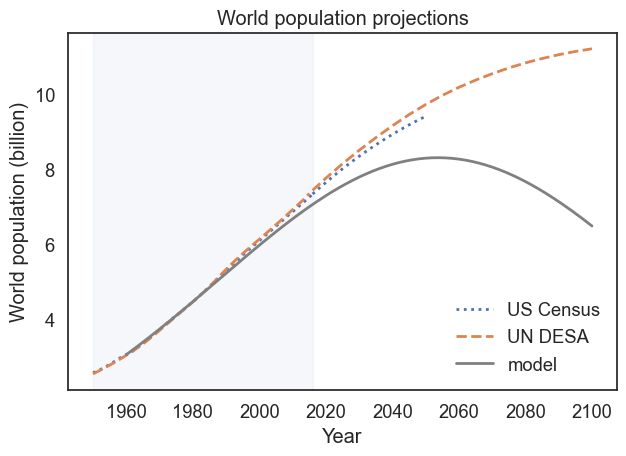

In [28]:
# plot results of simulation 

results = run_simulation(system)
plt.axvspan(1950, 2016, color='C0', alpha=0.05)
plot_results(census, un, results, 'World population projections')
plot_projections(table3)

We can see that the model predicts a population decrease after we get to the year 2055. This is due to the fact that the growth rate continues to decrease at a linear rate. A better model would likely be one that adjusts the growth rate exponentially. 

**Related viewing:** You might be interested in this [video by Hans Rosling about the demographic changes we expect in this century](https://www.youtube.com/watch?v=ezVk1ahRF78).

# Part 2

Complete the exercises found [here](https://github.com/AllenDowney/ModSimPy/blob/master/notebooks/chap09.ipynb).


The following displays SymPy expressions and provides the option of showing results in LaTeX format.

In [29]:
from sympy.printing import latex

def show(expr, show_latex=False):
    """Display a SymPy expression.
    
    expr: SymPy expression
    show_latex: boolean
    """
    if show_latex:
        print(latex(expr))
    return expr

# Set up Jupyter notebook to display math.
from sympy import *
init_printing() 

### Analysis with SymPy

Create a symbol for time.

In [30]:
t = symbols('t')

If you combine symbols and numbers, you get symbolic expressions.

In [31]:
expr = t + 1

The result is an `Add` object, which just represents the sum without trying to compute it.

In [32]:
type(expr)

sympy.core.add.Add

`subs` can be used to replace a symbol with a number, which allows the addition to proceed.

In [33]:
expr.subs(t, 2)

`f` is a special class of symbol that represents a function.

In [34]:
f = Function('f')

f

The type of `f` is `UndefinedFunction`

In [35]:
type(f)

sympy.core.function.UndefinedFunction

SymPy understands that `f(t)` means `f` evaluated at `t`, but it doesn't try to evaluate it yet.

In [36]:
f(t)

`diff` returns a `Derivative` object that represents the time derivative of `f`

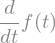

In [37]:
dfdt = diff(f(t), t)

In [38]:
type(dfdt)

sympy.core.function.Derivative

We need a symbol for `alpha`

In [39]:
alpha = symbols('alpha')

Now we can write the differential equation for proportional growth.

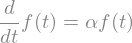

In [40]:
eq1 = Eq(dfdt, alpha*f(t))

And use `dsolve` to solve it.  The result is the general solution.

In [41]:
solution_eq = dsolve(eq1)

We can tell it's a general solution because it contains an unspecified constant, `C1`.

In this example, finding the particular solution is easy: we just replace `C1` with `p_0`

In [42]:
C1, p_0 = symbols('C1 p_0')

In [43]:
particular = solution_eq.subs(C1, p_0)

In the next example, we have to work a little harder to find the particular solution.

### Solving the quadratic growth equation 

We'll use the (r, K) parameterization, so we'll need two more symbols:

In [44]:
r, K = symbols('r K')

Now we can write the differential equation.

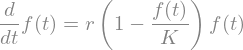

In [45]:
eq2 = Eq(diff(f(t), t), r * f(t) * (1 - f(t)/K))

And solve it.

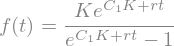

In [46]:
solution_eq = dsolve(eq2)

The result, `solution_eq`, contains `rhs`, which is the right-hand side of the solution.

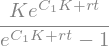

In [47]:
general = solution_eq.rhs

We can evaluate the right-hand side at $t=0$

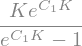

In [48]:
at_0 = general.subs(t, 0)

Now we want to find the value of `C1` that makes `f(0) = p_0`.

So we'll create the equation `at_0 = p_0` and solve for `C1`.  Because this is just an algebraic identity, not a differential equation, we use `solve`, not `dsolve`.

The result from `solve` is a list of solutions.  In this case, [we have reason to expect only one solution](https://en.wikipedia.org/wiki/Picard%E2%80%93Lindel%C3%B6f_theorem), but we still get a list, so we have to use the bracket operator, `[0]`, to select the first one.

In [49]:
solutions = solve(Eq(at_0, p_0), C1)
type(solutions), len(solutions)

(list, 1)

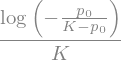

In [50]:
value_of_C1 = solutions[0]

Now in the general solution, we want to replace `C1` with the value of `C1` we just figured out.

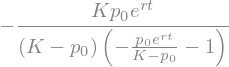

In [51]:
particular = general.subs(C1, value_of_C1)

The result is complicated, but SymPy provides a method that tries to simplify it.

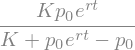

In [52]:
particular = simplify(particular)

Often simplicity is in the eye of the beholder, but that's about as simple as this expression gets.

Just to double-check, we can evaluate it at `t=0` and confirm that we get `p_0`

In [53]:
particular.subs(t, 0)

This solution is called the [logistic function](https://en.wikipedia.org/wiki/Population_growth#Logistic_equation).

In some places you'll see it written in a different form:

$f(t) = \frac{K}{1 + A e^{-rt}}$

where $A = (K - p_0) / p_0$.

We can use SymPy to confirm that these two forms are equivalent.  First we represent the alternative version of the logistic function:

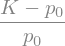

In [54]:
A = (K - p_0) / p_0

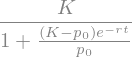

In [55]:
logistic = K / (1 + A * exp(-r*t))

To see whether two expressions are equivalent, we can check whether their difference simplifies to 0.

In [56]:
simplify(particular - logistic)

This test only works one way: if SymPy says the difference reduces to 0, the expressions are definitely equivalent (and not just numerically close).

But if SymPy can't find a way to simplify the result to 0, that doesn't necessarily mean there isn't one.  Testing whether two expressions are equivalent is a surprisingly hard problem; in fact, there is no algorithm that can solve it in general.

### Exercises

**Exercise:** Solve the quadratic growth equation using the alternative parameterization

$\frac{df(t)}{dt} = \alpha f(t) + \beta f^2(t) $

In [57]:
# add beta as a new symbol (only one that hasn't yet been defined)

b = symbols('beta')

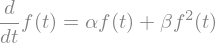

In [59]:
# define differential equation

quad_eq = Eq(diff(f(t), t), alpha * f(t) + b * f(t)**2)

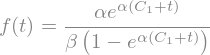

In [60]:
# calculate solution to the differential equation.

quad_sol = dsolve(quad_eq)

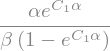

In [61]:
# solve f(0)

at_0 = quad_sol.rhs.subs(t, 0)

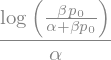

In [62]:
# determine value of C_1 using initial condition f(0) = p_0

solutions = solve(Eq(at_0, p_0), C1)
C1_val = solutions[0]

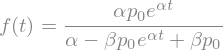

In [63]:
# plug in value of C_1 back into f(t)

final_sol = simplify(quad_sol.subs(C1, C1_val))

In [64]:
# check to make sure our answer is correct: f(t) = p_0 when t=0

final_sol.subs(t, 0)

**Exercise:**  Use [WolframAlpha](https://www.wolframalpha.com/) to solve the quadratic growth model, using either or both forms of parameterization:

    df(t) / dt = alpha f(t) + beta f(t)^2

or

    df(t) / dt = r f(t) (1 - f(t)/K)

Find the general solution and also the particular solution where `f(0) = p_0`.

[Mathematica was used](https://www.wolframcloud.com/obj/williamjasmine06/Published/Assignment4.nb) to solve the first differential equation. The results are the same as those shown above.